# Проектная работа
## Регрессия. Метод опорных векторов. Датасет `sklearn.datasets.load_diabetes`
## Вариант №13


Метод опорных векторов (Support Vector Machines, SVM) в регрессии, также известный как Support Vector Regression (SVR), является методом машинного обучения, используемым для решения задач регрессии. Вместо того чтобы предсказывать точные значения целевой переменной, как в случае обычной линейной регрессии, SVR пытается создать функцию, которая укладывается в пределы заданного коридора (или трубы) вокруг целевых значений.

Основные идеи метода опорных векторов в регрессии:

    Труба (Epsilon-Tube): SVR вводит понятие трубы вокруг регрессионной линии. Труба определяет допустимый диапазон отклонений для предсказания модели.

    Опорные векторы: Как и в классификации, опорные векторы представляют собой точки данных, которые лежат на границах трубы и влияют на построение регрессионной модели.

Виды методов опорных векторов в регрессии:

    LinearSVR: Используется для линейной регрессии. Минимизирует среднеквадратичную ошибку.

    SVR с ядрами (kernelized SVR): Используется для нелинейной регрессии. Вместо линейной функции использует ядра (например, полиномиальные, радиально-базисные функции) для преобразования данных и создания нелинейной регрессионной модели.
        
        Линейное ядро (linear):
            Описание: Просто использует линейную функцию для преобразования данных.
            Использование: Подходит, когда зависимость между признаками и целевой переменной является линейной.

        Полиномиальное ядро (poly):
            Описание: Преобразует данные с использованием полиномиальной функции.
            Параметры: Степень полинома (degree), коэффициент свободного члена (coef0).
            Использование: Эффективно для данных с нелинейными зависимостями, но важно аккуратно выбирать степень полинома.

        RBF (Radial Basis Function) ядро (rbf):
            Описание: Преобразует данные с использованием радиально-базисной функции.
            Параметры: Ширина ядра (gamma).
            Использование: Часто используется, когда нелинейная зависимость между признаками и целевой переменной сложна и неизвестна.

    Epsilon-Support Vector Regression (ε-SVR): Вводит параметр "epsilon" для определения ширины трубы. Различается по тому, как обрабатываются точки данных, находящиеся внутри трубы и вне ее.

Датасет `sklearn.datasets.load_diabetes` содержит следующие параметры (признаки) для каждого пациента:

1. **Age (Возраст):** Возраст пациента в годах.

2. **Sex (Пол):** Пол пациента (мужской - 1, женский - 2).

3. **BMI (Индекс массы тела):** Индекс массы тела пациента.

4. **BP (Кровяное давление):** Среднее кровяное давление пациента.

5. **S1, S2, S3, S4, S5, S6 (Шесть медицинских измерений):** Шесть различных медицинских измерений, таких как уровень сердечно-сосудистых маркеров.

Целевая переменная (прогрессирование заболевания) также присутствует в датасете.

In [42]:
# Импортируем нужные библиотеки и функции, в том числе датасет
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [43]:
# Загрузка датасета
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [44]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### LinearSVR 

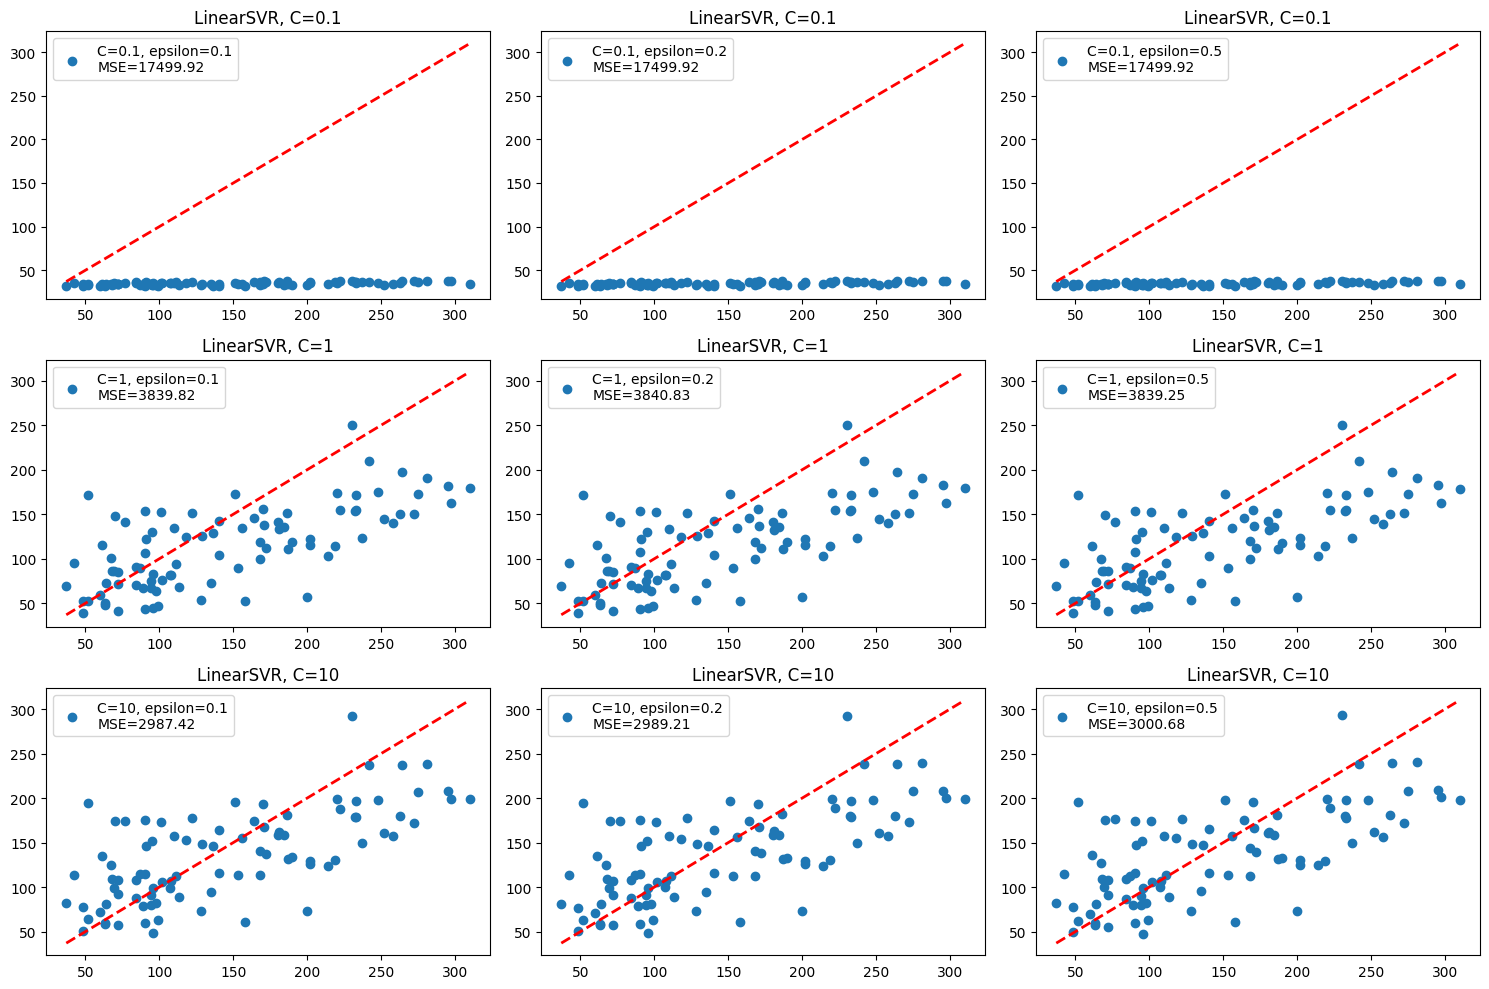

In [49]:
# Параметры для перебора
Cs = [0.1, 1, 10]
epsilons = [0.1, 0.2, 0.5]

# Построение графиков для различных комбинаций параметров
fig, axs = plt.subplots(len(Cs), len(epsilons), figsize=(15, 10))

for i, C in enumerate(Cs):
    for j, epsilon in enumerate(epsilons):
        # Создание и обучение модели LinearSVR
        model = LinearSVR(C=C, epsilon=epsilon, dual=True, random_state=42)
        model.fit(X_train_scaled, y_train)

        # Предсказание на тестовом наборе
        y_pred = model.predict(X_test_scaled)

        # Оценка качества модели
        mse = mean_squared_error(y_test, y_pred)

        # График фактических значений vs. предсказанных значений
        axs[i, j].scatter(y_test, y_pred, label=f'C={C}, epsilon={epsilon}\nMSE={mse:.2f}')
        axs[i, j].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
        axs[i, j].set_title(f'LinearSVR, C={C}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()

Получили наименьшее `MSE = 2987.42` при `C = 10` и `epsilon = 0.1`

#### Kernelized SVR (Linear, Poly and RBF kernels)

Лучшие параметры: {'kernel': 'rbf', 'degree': 2, 'C': 10, 'epsilon': 0.5}
Наименьшая ошибка (MSE): 2679.95


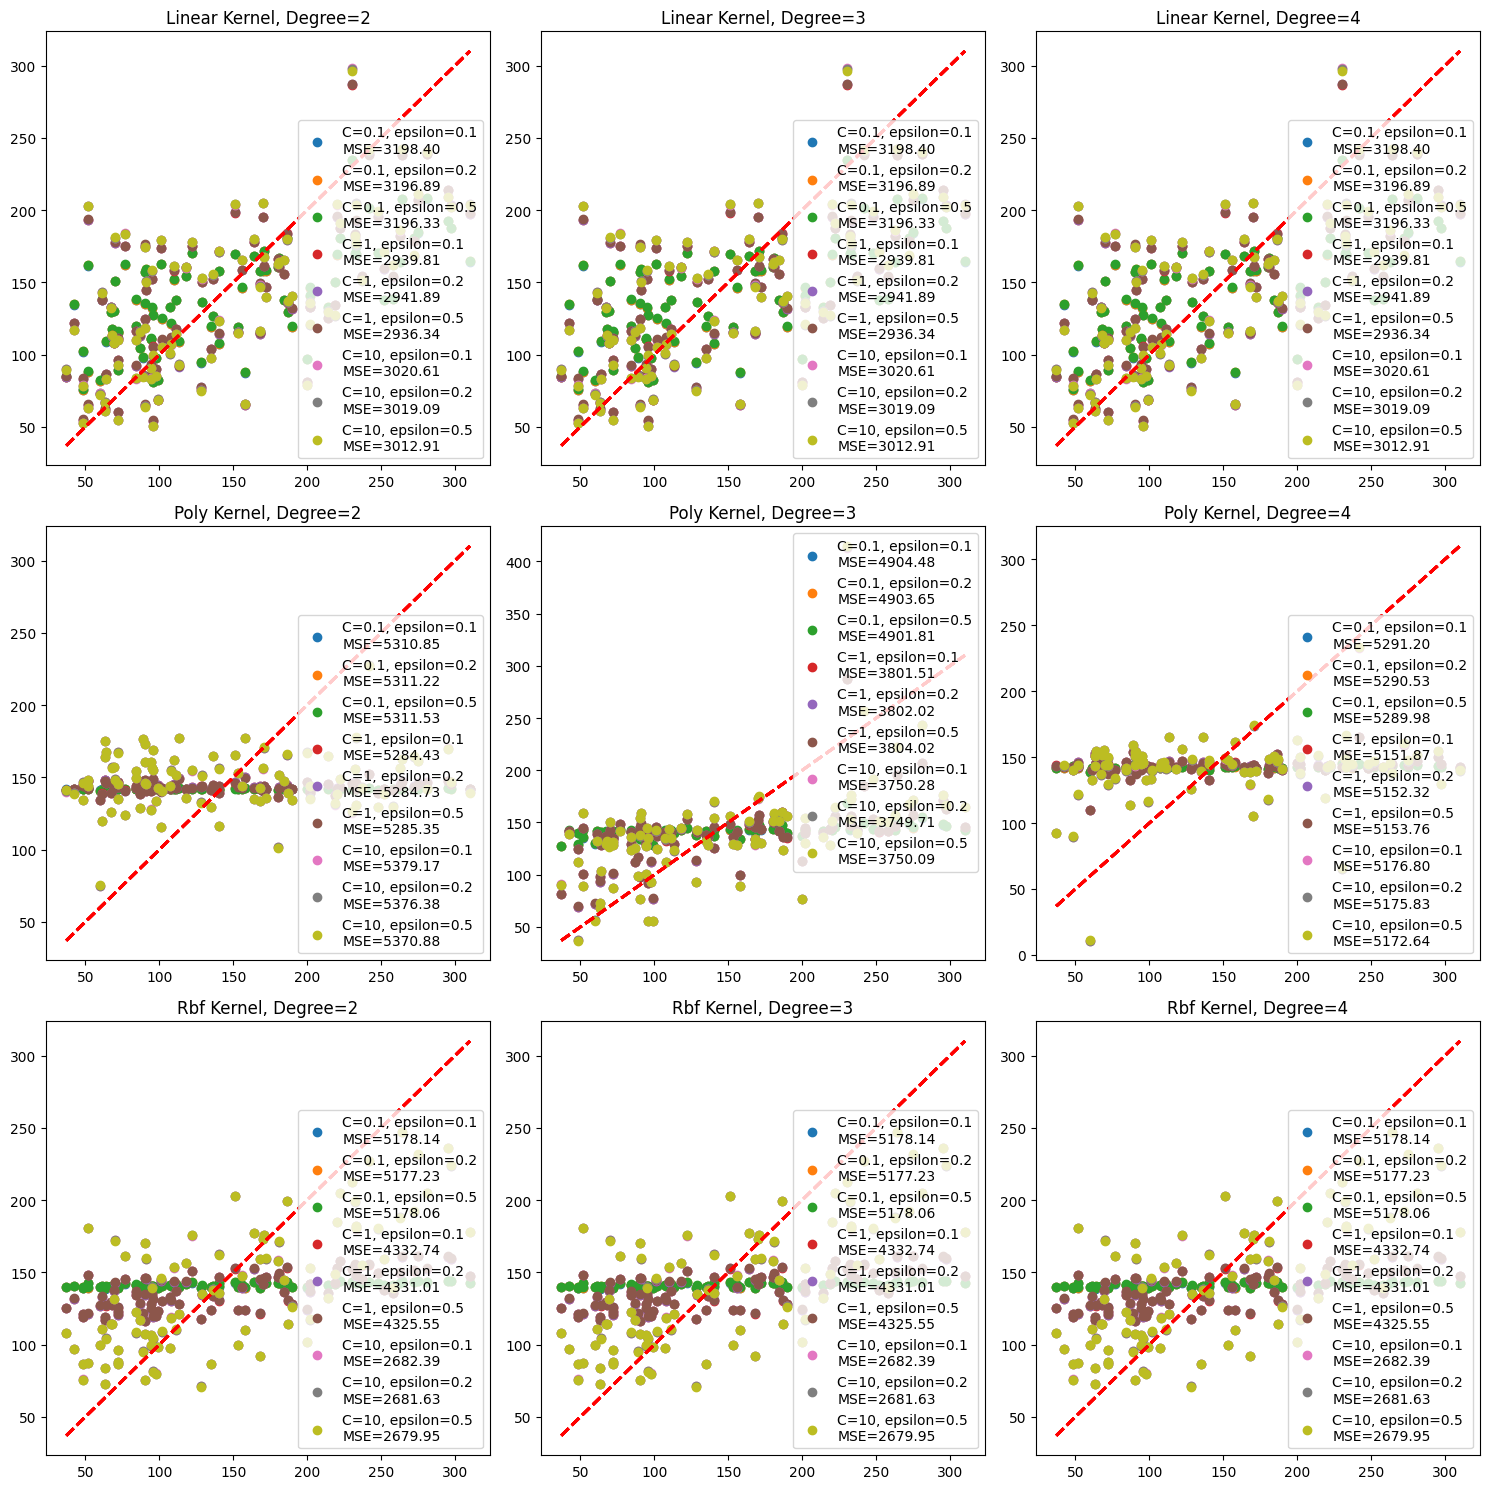

In [50]:
# Параметры для перебора
kernels = ['linear', 'poly', 'rbf']
degrees = [2, 3, 4]
Cs = [0.1, 1, 10]
epsilons = [0.1, 0.2, 0.5]

best_params = None
best_mse = float('inf')

# Построение графиков для различных комбинаций параметров
fig, axs = plt.subplots(len(kernels), len(degrees), figsize=(15, 15))

for i, kernel in enumerate(kernels):
    for j, degree in enumerate(degrees):
        for k, C in enumerate(Cs):
            for l, epsilon in enumerate(epsilons):
                # Создание и обучение модели SVR
                model = SVR(kernel=kernel, degree=degree, C=C, epsilon=epsilon)
                model.fit(X_train_scaled, y_train)

                # Предсказание на тестовом наборе
                y_pred = model.predict(X_test_scaled)

                # Оценка качества модели
                mse = mean_squared_error(y_test, y_pred)

                # График фактических значений vs. предсказанных значений
                axs[i, j].scatter(y_test, y_pred, label=f'C={C}, epsilon={epsilon}\nMSE={mse:.2f}')
                axs[i, j].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
                axs[i, j].set_title(f'{kernel.capitalize()} Kernel, Degree={degree}')
                axs[i, j].legend()

                # Сохранение лучших параметров
                if mse < best_mse:
                    best_mse = mse
                    best_params = {'kernel': kernel, 'degree': degree, 'C': C, 'epsilon': epsilon}

# Вывод лучших параметров
print(f"Лучшие параметры: {best_params}")
print(f"Наименьшая ошибка (MSE): {best_mse:.2f}")

plt.tight_layout()
plt.show()


#### Epsilon-Support Vector Regression (ε-SVR)

Лучшие параметры: {'C': 1, 'epsilon': 0.5}
Наименьшая ошибка (MSE): 2936.34


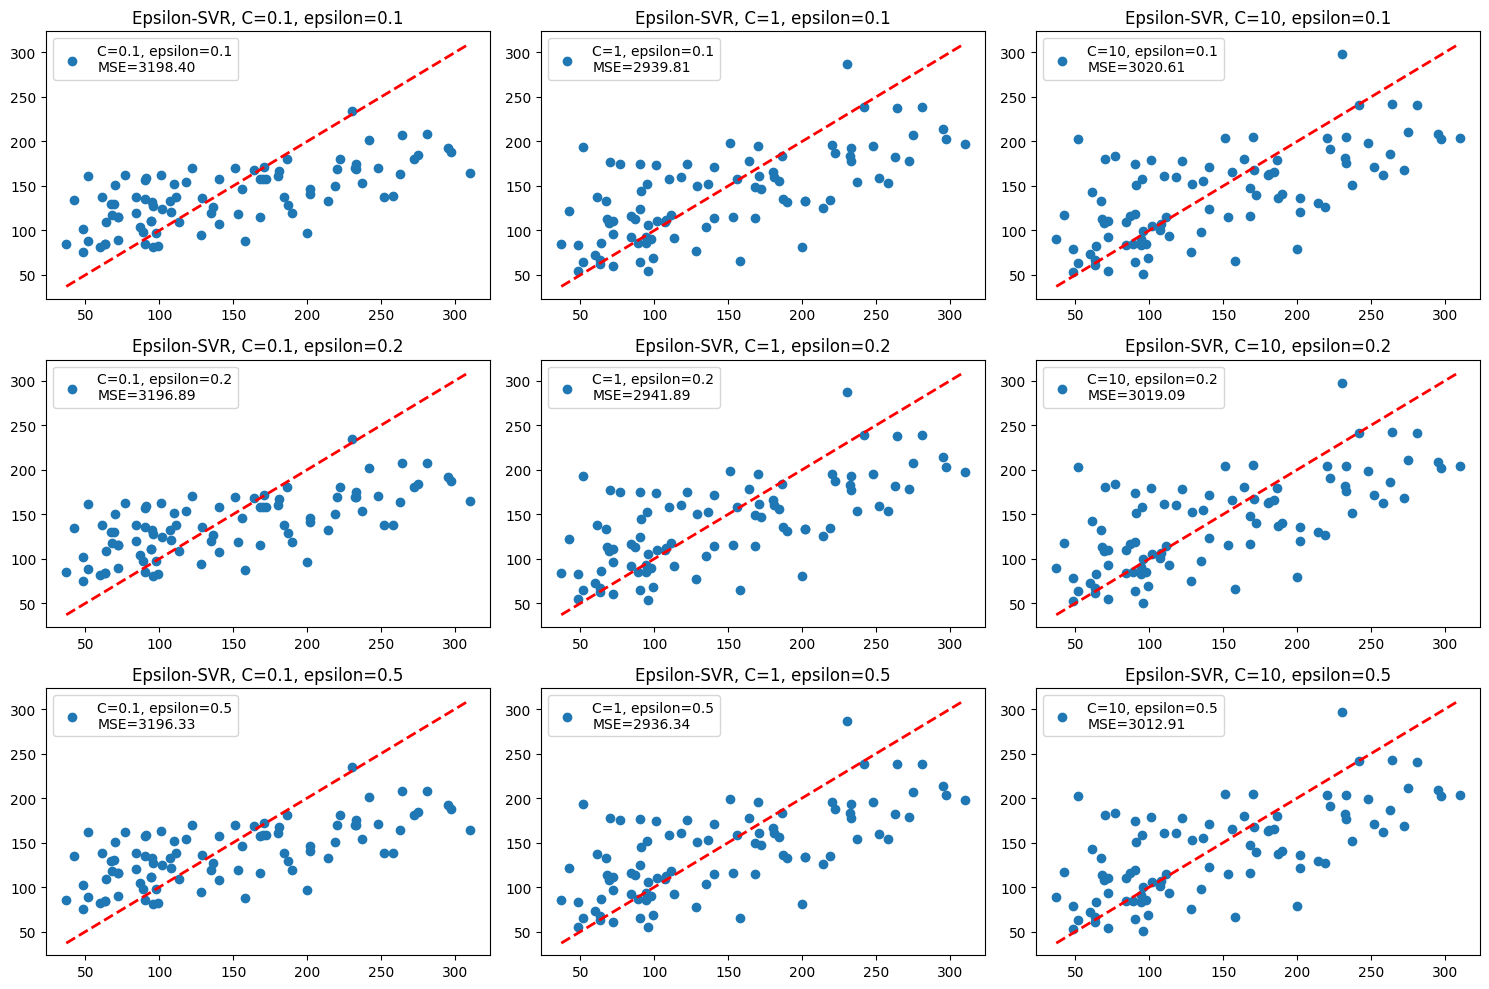

In [51]:
# Параметры для перебора
epsilons = [0.1, 0.2, 0.5]
Cs = [0.1, 1, 10]

best_params = None
best_mse = float('inf')

# Построение графиков для различных комбинаций параметров
fig, axs = plt.subplots(len(epsilons), len(Cs), figsize=(15, 10))

for i, epsilon in enumerate(epsilons):
    for j, C in enumerate(Cs):
        # Создание и обучение модели SVR
        model = SVR(kernel='linear', C=C, epsilon=epsilon)
        model.fit(X_train_scaled, y_train)

        # Предсказание на тестовом наборе
        y_pred = model.predict(X_test_scaled)

        # Оценка качества модели
        mse = mean_squared_error(y_test, y_pred)

        # График фактических значений vs. предсказанных значений
        axs[i, j].scatter(y_test, y_pred, label=f'C={C}, epsilon={epsilon}\nMSE={mse:.2f}')
        axs[i, j].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
        axs[i, j].set_title(f'Epsilon-SVR, C={C}, epsilon={epsilon}')
        axs[i, j].legend()

        # Сохранение лучших параметров
        if mse < best_mse:
            best_mse = mse
            best_params = {'C': C, 'epsilon': epsilon}

# Вывод лучших параметров
print(f"Лучшие параметры: {best_params}")
print(f"Наименьшая ошибка (MSE): {best_mse:.2f}")

plt.tight_layout()
plt.show()

#### Итого:

Лучший метод: `Kernelized SVR` - `RBF (Radial Basis Function) kernel`

Лучшие параметры: `{'kernel': 'rbf', 'degree': 2, 'C': 10, 'epsilon': 0.5}`

Наименьшая ошибка (MSE): `2679.95`